In [1]:
import pandas as pd
df=pd.read_csv("Bengaluru_House_Data.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [2]:
df.shape

(13320, 9)

In [3]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [4]:
df=df.drop(["area_type","society","availability","location"],axis=1)
df.head()

,size,total_sqft,bath,balcony,price
0,2 BHK,1056,2.0,1.0,39.07
1,4 Bedroom,2600,5.0,3.0,120.00
2,3 BHK,1440,2.0,3.0,62.00
3,3 BHK,1521,3.0,1.0,95.00
4,2 BHK,1200,2.0,1.0,51.00


In [5]:
df.isnull().sum()

size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [6]:
df1=df.fillna(method="ffill")
df1.head()

,size,total_sqft,bath,balcony,price
0,2 BHK,1056,2.0,1.0,39.07
1,4 Bedroom,2600,5.0,3.0,120.00
2,3 BHK,1440,2.0,3.0,62.00
3,3 BHK,1521,3.0,1.0,95.00
4,2 BHK,1200,2.0,1.0,51.00


In [7]:
df2=df1.replace("[A-Za-z]","",regex=True)
df2.head()

,size,total_sqft,bath,balcony,price
0,2,1056,2.0,1.0,39.07
1,4,2600,5.0,3.0,120.00
2,3,1440,2.0,3.0,62.00
3,3,1521,3.0,1.0,95.00
4,2,1200,2.0,1.0,51.00


In [8]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df2['size']=le.fit_transform(df2['size'])
df2['total_sqft']=le.fit_transform(df2['total_sqft'])


In [9]:
df2.bath=df2.bath.astype(int)
df2.bath.head()


0    2
1    5
2    2
3    3
4    2
Name: bath, dtype: int32

In [10]:
df2.balcony=df2.balcony.astype(int)
df2.balcony.head()


0    1
1    3
2    3
3    1
4    1
Name: balcony, dtype: int32

In [11]:
df2.price=df2.price.astype(int)
df2.price.head()


0     39
1    120
2     62
3     95
4     51
Name: price, dtype: int32

In [12]:
df2.dtypes

size          int32
total_sqft    int32
bath          int32
balcony       int32
price         int32
dtype: object

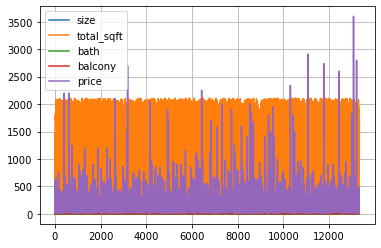

In [13]:
import matplotlib.pyplot as plt
df2.plot()
plt.grid()

Text(0, 0.5, 'price')

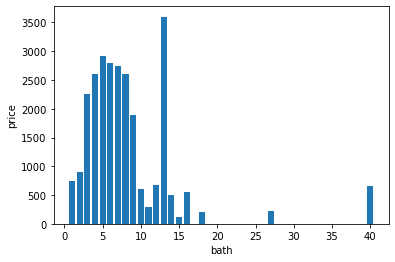

In [14]:
plt.bar(df2.bath,df2.price)
plt.xlabel("bath")
plt.ylabel("price")

Text(0, 0.5, 'total_sqft')

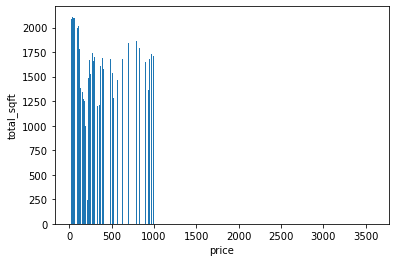

In [15]:
plt.bar(df2.price,df2.total_sqft)
plt.xlabel("price")
plt.ylabel("total_sqft")

In [16]:
x=df2.drop('price',axis=1)
x.head()

,size,total_sqft,bath,balcony
0,9,70,2,1
1,12,1284,5,3
2,11,513,2,3
3,11,600,3,1
4,9,239,2,1


In [17]:
y=df2.price
y.head()

0     39
1    120
2     62
3     95
4     51
Name: price, dtype: int32

In [18]:
from sklearn.svm import SVC

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [20]:
model=SVC(kernel='rbf',gamma='auto',C=30)
model.fit(x_train,y_train)
model.score(x_test,y_test)

KeyboardInterrupt: 

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x,y)

In [ ]:
lr.score(x,y)

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

In [ ]:
model.score(x_test,y_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion='gini')
dt.fit(x_train,y_train)

In [ ]:
dt.score(x_test,y_test)

In [ ]:
from sklearn.externals import joblib

In [ ]:
joblib.dump(lr,'model2')

In [ ]:
Bengaluru_House_Data2=joblib.load('model2')